In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy
import tensorflow as tf

from shash_tfp import Shash

__author__ = "Randal J. Barnes, Elizabeth A. Barnes, Mark DeMaria"
__date__ = "11 June 2022"

Consider two independent SHASH random variables -- we will call them X and Y.

In [2]:
x_dist  = Shash(loc=0.0, scale=1.0, skewness=1.0, tailweight=1.0)
y_dist  = Shash(loc=0.0, scale=1.0, skewness=2.0, tailweight=1.0)

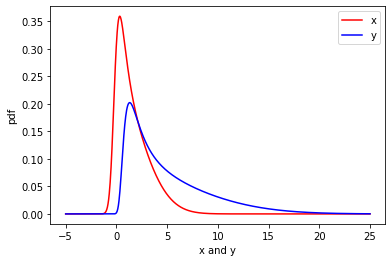

In [3]:
x = np.linspace(-5, 25, 1000)
x_pdf = x_dist.prob(x)

y = np.linspace(-5, 25, 1000)
y_pdf = y_dist.prob(y)

plt.plot(x, x_pdf, "-r", y, y_pdf, "-b")
plt.xlabel("x and y")
plt.ylabel("pdf")
plt.legend(["pdf(x)", "pdf(y)"])

We create a "bivariate SHASH random vector" (x, y) by combining the two independent x and y.  The resulting bivariate pdf is simply the product of the univariate pdf's: pdf(x,y) = pdf(x) * pdf(y).  The figure below shows the contours of the bivariate pdf.  The contours are not elliptical.

In [37]:
nx = 100 
ny = 100

x = np.linspace(-1, 5, nx)
x_pdf = x_dist.prob(x)

y = np.linspace(0, 12, ny)
y_pdf = y_dist.prob(y)

xy_pdf = np.zeros([nx, ny])
for i in range(0, ny):
    for j in range(0, nx):
        xy_pdf[i, j] = x_pdf[j] * y_pdf[i]
        
lbx = x_dist.quantile(1/2 - 1/(2*np.sqrt(2)))
ubx = x_dist.quantile(1/2 + 1/(2*np.sqrt(2)))
lby = y_dist.quantile(1/2 - 1/(2*np.sqrt(2)))
uby = y_dist.quantile(1/2 + 1/(2*np.sqrt(2)))       

Text(0.5, 1.0, 'Bivariate pdf of independent shash x and shash y')

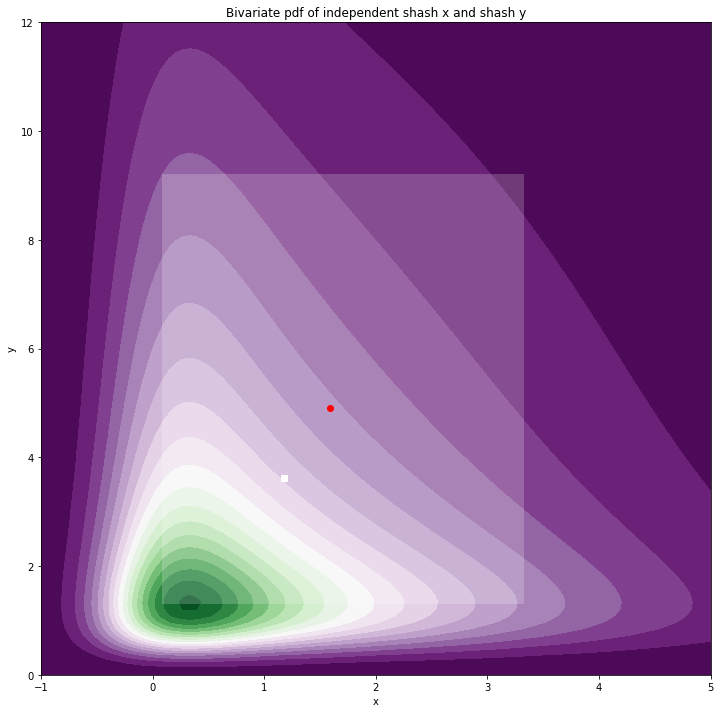

In [45]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.contourf(x, y, xy_pdf, 20, cmap='PRGn')

plt.fill([lbx, ubx, ubx, lbx, lbx], [lby, lby, uby, uby, lby], 'w', alpha=0.20)

plt.plot(x_dist.mean(), y_dist.mean(), 'or')
plt.plot(x_dist.median(), y_dist.median(), 'sw')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Bivariate pdf of independent shash x and shash y")